In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# %load_ext autoreload
# %autoreload 2
import joblib

#TODO setup a general pull for thee two sets
# Should be able to automatically bring them from the database
# interview = pd.read_csv("../data/raw/interview_2017_2019.csv")
non_urm_matrix = pd.read_csv("/gpfs/data/iime/data/admissions/non_urm_matrix.csv", index_col=['aamc_id', 'application_year'])
# urm_matrix = pd.read_csv("../data/raw/urm_matrix.csv", index_col=['aamc_id', 'application_year'])
# non_urm_matrix["urm"] = 0
# urm_matrix["urm"] = 1


In [2]:
# all_apps = pd.concat([non_urm_matrix, urm_matrix])
all_apps = non_urm_matrix
all_apps.head()

,,outcome,exp_publications,exp_publications_hours,exp_leadership,exp_leadership_hours,exp_medical,exp_medical_hours,exp_shadowing,exp_shadowing_hours,exp_military,...,parent_bachelor,parent_masters,parent_doctoral_non_medical,parent_medical,degree_type_bachelor,degree_type_master,degree_type_doctoral_non_medical,degree_type_medical,is_top_25,highest_degree_type
aamc_id,application_year,,,,,,,,,,,,,,,,,,,,,
14473026,2018,invite,0.0,0.0,0.0,0.0,6.0,2174.0,3.0,56.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,bachelor
14182676,2018,invite,1.0,0.0,1.0,100.0,1.0,98.0,1.0,99.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,bachelor
14425039,2018,invite,0.0,0.0,1.0,570.0,2.0,85.0,2.0,150.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,bachelor
14323510,2018,reject,0.0,0.0,0.0,0.0,2.0,250.0,1.0,20.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,bachelor
14381799,2018,reject,0.0,0.0,1.0,660.0,1.0,150.0,2.0,198.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,bachelor


In [3]:
all_apps.columns

Index(['outcome', 'exp_publications', 'exp_publications_hours',
       'exp_leadership', 'exp_leadership_hours', 'exp_medical',
       'exp_medical_hours', 'exp_shadowing', 'exp_shadowing_hours',
       'exp_military', 'exp_military_hours', 'exp_research',
       'exp_research_hours', 'exp_athletics', 'exp_athletics_hours',
       'Biology_A', 'Biology_B', 'Biology_C', 'Biology_D', 'Biology_F',
       'Chemistry_A', 'Chemistry_B', 'Chemistry_C', 'Chemistry_D',
       'Chemistry_F', 'Math_A', 'Math_B', 'Math_C', 'Math_D', 'Math_F',
       'Physics_A', 'Physics_B', 'Physics_C', 'Physics_D', 'Physics_F',
       'mcat_percentile_overall', 'mcat_percentile_bio',
       'mcat_percentile_chemphy', 'mcat_version', 'count_mcat', 'did_postbacc',
       'attended_grad_school', 'bcpm_gpa_cumulative', 'bcpm_hours_cumulative',
       'total_gpa_cumulative', 'bcpm_gpa_postbac', 'bcpm_hours_postbac',
       'total_gpa_postbac', 'sophomore_gpa_higher', 'junior_gpa_higher',
       'senior_gpa_higher', '

In [4]:
# Get query to include in final production model
# decision = interview.loc[:,["amcas_id", "invite_type_id"]]
# decision
decision = all_apps.loc[:,["outcome"]]
decision.head()

,,outcome
aamc_id,application_year,
14473026,2018,invite
14182676,2018,invite
14425039,2018,invite
14323510,2018,reject
14381799,2018,reject


In [5]:
decision = pd.DataFrame(np.where(decision.outcome.values == 'invite', 1, 0),
          decision.index)
decision = decision.rename(columns={0: "outcome"})
decision.head()

,,outcome
aamc_id,application_year,
14473026,2018,1
14182676,2018,1
14425039,2018,1
14323510,2018,0
14381799,2018,0


In [6]:
from sklearn import *

/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are m

In [7]:
from sklearn.preprocessing import Imputer

# import KNNImputer, SimpleImputer
# from sklearn.preprocessing import SimpleImputer
import sklearn
print(sklearn.__version__)

0.19.1


In [8]:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
# from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler

def split_data_full(dat: pd.DataFrame):
#     X, y = dat.drop('invite_type_id', 1), dat.loc[:,"invite_type_id"]
    X, y = dat.drop('outcome', 1), dat.loc[:,"outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    train_idx = X_train.aamc_id.reset_index()
    test_idx = X_test.aamc_id.reset_index()
    X_train = X_train.drop(columns = "aamc_id")
    X_test = X_test.drop(columns = "aamc_id")
#     return {"X_train": X_train.values, "X_test": X_test.values, "y_train": y_train.values, 
#             "y_test": y_test.values, "train_idx": train_idx, "test_idx": test_idx, "header": X_train.columns}
    return {"x_train": X_train.values, "x_test": X_test.values, "y_train": y_train.values, 
            "y_test": y_test.values}

def split_data_by_year(dat, train_years, test_years):
    train = dat[dat.application_year.isin(train_years)]
    test = dat[dat.application_year.isin(test_years)]
#     X_train, y_train = train.drop('invite_type_id', 1), train.loc[:,"invite_type_id"]
#     X_test, y_test = test.drop('invite_type_id', 1), test.loc[:,"invite_type_id"]
    X_train, y_train = train.drop('outcome', 1), train.loc[:,"outcome"]
    X_test, y_test = test.drop('outcome', 1), test.loc[:,"outcome"]
    train_idx = X_train.aamc_id.reset_index()
    test_idx = X_test.aamc_id.reset_index()
    X_train = X_train.drop(columns = "aamc_id")
    X_test = X_test.drop(columns = "aamc_id")
#     return {"x_train": X_train.values, "x_test": X_test.values, "y_train": y_train.values, 
#             "y_test": y_test.values, "train_idx": train_idx, "test_idx": test_idx, "header": X_train.columns}
    return {"x_train": X_train.values, "x_test": X_test.values, "y_train": y_train.values, 
            "y_test": y_test.values}

In [9]:
def plot_roc_curve(y_true, y_score):
    
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))

    fpr, tpr, _ = roc_curve(y_true, y_score)
    prec, rec, _ = precision_recall_curve(y_true, y_score)

    ax[0].plot(fpr, tpr, linewidth = 2)
    ax[0].plot([0,1], [0,1], "k--")
    ax[0].set_xlabel('False Positive Rate', fontsize = 18)
    ax[0].set_ylabel('True Positive Rate', fontsize = 18)

    ax[1].plot(rec, prec, linewidth = 2)
    ax[1].set_xlabel("Recall", fontsize = 18)
    ax[1].set_ylabel("Precision", fontsize = 18)
    plt.show()


In [10]:
# %load_ext autoreload
# %autoreload 2

In [11]:
# import sys
# sys.path[0] = "/Users/dla/Documents/admissions_nlp/"

In [12]:
from src import preprocessing
# import srcpreprocessing as preprocessing

In [13]:
clean_matrix = preprocessing.prepare_data(all_apps)
# full_matrix = pd.merge(clean_matrix.reset_index(), decision, left_on = "aamc_id",
#          right_on = "amcas_id", how = "left").drop("amcas_id", 1)
full_matrix = pd.merge(clean_matrix.reset_index(), decision, left_on = "aamc_id", right_on = "aamc_id")
# full_matrix
full_matrix["outcome"].fillna(0, inplace = True)
presplit_matrix = full_matrix[~full_matrix["aamc_id"].duplicated()]


In [14]:
#presplit_matrix  structured data

In [15]:
essays_data = pd.read_csv("/gpfs/data/iime/data/admissions/essays_latest.csv")
essays_data.head()

,aamc_id,app_year,personal_statement,scrn_score_1,scrn_score_2
0,12261371,2018,Whenever I reveal my interest in medicine duri...,3.0,3.0
1,12332712,2017,The morning after Hamas rockets first reached ...,3.0,1.0
2,12626786,2017,The 208th Hospital of the Chinese PLA is a hig...,2.0,2.0
3,12647810,2018,I have thought about studying and practicing m...,2.0,2.0
4,12663244,2019,A transformative religious studies class on Ch...,2.0,1.0


In [16]:
from src import preprocess_essay as preprocess_essay

essay = preprocess_essay.process_all(essays_data, 'personal_statement')

half way done processing
finished processing


In [17]:
structured_essay = pd.merge(presplit_matrix, essay)
structured_essay.head()

,aamc_id,application_year,exp_publications,exp_publications_years,exp_leadership,exp_leadership_years,exp_medical,exp_medical_years,exp_shadowing,exp_shadowing_years,...,female,outcome,personal_statement,lexicon_count,sentence_count,syllable_count,flesch_reading_ease,standard_score,nyu_mentions,lexical_density
0,14473026,2018,0.0,0.0,0.0,0.000000,6.0,1.194505,3.0,0.030769,...,0,1,in the fifth grade i was a class clown as th...,841,30,1385,43.06,17.0,0,0.004910
1,14182676,2018,1.0,0.0,1.0,0.054945,1.0,0.053846,1.0,0.054396,...,1,1,the monotonous drone of buzzing flies filled t...,842,30,1376,42.95,14.0,0,0.005094
2,14425039,2018,0.0,0.0,1.0,0.313187,2.0,0.046703,2.0,0.082418,...,1,1,the phone is ringing once twice three times...,903,46,1350,60.04,8.0,0,0.005095
3,14323510,2018,0.0,0.0,0.0,0.000000,2.0,0.137363,1.0,0.010989,...,0,0,the summer heat was brutal exerting a palpabl...,940,29,1335,55.51,14.0,0,0.005130
4,14381799,2018,0.0,0.0,1.0,0.362637,1.0,0.082418,2.0,0.108791,...,1,0,i m happy you are leaving you have so much m...,871,28,1392,39.91,12.0,0,0.005099


/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


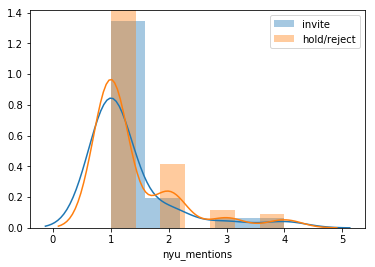

In [18]:
nyu_feature_hist = structured_essay[structured_essay.nyu_mentions > 0]
sns.distplot(nyu_feature_hist['nyu_mentions'][nyu_feature_hist.outcome == 1], label='invite')
sns.distplot(nyu_feature_hist['nyu_mentions'][nyu_feature_hist.outcome == 0], label='hold/reject')
plt.legend()
plt.show()
# sns.distplot(df['nyu_mentions'][df.outcome == 4], kde=False)

/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


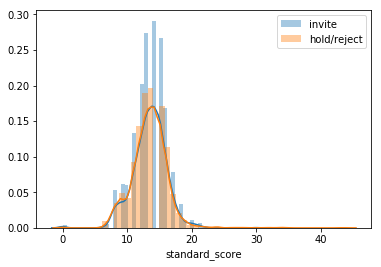

In [19]:
standard_score_feature_hist = structured_essay[structured_essay.standard_score < 50]
sns.distplot(standard_score_feature_hist['standard_score'][standard_score_feature_hist.outcome == 1], label='invite')
sns.distplot(standard_score_feature_hist['standard_score'][standard_score_feature_hist.outcome == 0], label='hold/reject')
plt.legend()
plt.show()

/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


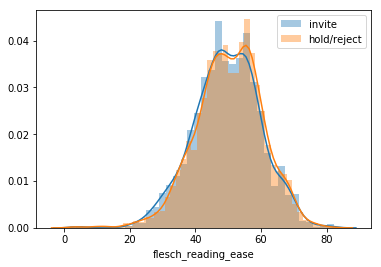

In [20]:
flesch_reading_ease_feature_hist = structured_essay[structured_essay.flesch_reading_ease > 0]
sns.distplot(flesch_reading_ease_feature_hist['flesch_reading_ease'][flesch_reading_ease_feature_hist.outcome == 1], label='invite')
sns.distplot(flesch_reading_ease_feature_hist['flesch_reading_ease'][flesch_reading_ease_feature_hist.outcome == 0], label='hold/reject')
plt.legend()
plt.show()

/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/gpfs/share/apps/anaconda3/cpu/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


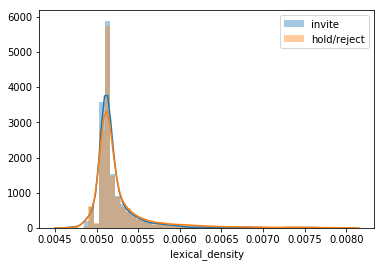

In [21]:
lexical_density_feature_hist = structured_essay[structured_essay.lexical_density < .008]
sns.distplot(lexical_density_feature_hist['lexical_density'][lexical_density_feature_hist.outcome == 1], label='invite')
sns.distplot(lexical_density_feature_hist['lexical_density'][lexical_density_feature_hist.outcome == 0], label='hold/reject')
plt.legend()
plt.show()

In [22]:
from src import word2vec as w2v

# word2vec(og_df, columnName, tdif, word_embedding_size=300, train_algo)
# tfid = true, includes tfidf weights
# word_embedding = 300, (default)
# train_algo = 0 = cbow, (default) 
# train_algo = 1 = skipgram

essay_cbow_tdif = w2v.word2vec(structured_essay, 'personal_statement', True, 300, 0)
essay_skip_tdif = w2v.word2vec(structured_essay, 'personal_statement', True, 300, 1)

essay_cbow = w2v.word2vec(structured_essay, 'personal_statement', False, 300, 0)
essay_skip = w2v.word2vec(structured_essay, 'personal_statement', False, 300, 1)

0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed
0 docs removed


In [23]:
# structured = split_data_by_year(presplit_matrix, train_years=[2017,2018], test_years = [2019])
# structured_essays = split_data_by_year(final, train_years=[2017,2018], test_years = [2019])

structured = split_data_full(presplit_matrix)

essay_cbow = essay_cbow.drop(columns=['personal_statement'])
essay_skip = essay_skip.drop(columns=['personal_statement'])
essay_cbow_tdif = essay_cbow_tdif.drop(columns=['personal_statement'])
essay_skip_tdif = essay_skip_tdif.drop(columns=['personal_statement'])

structured_essay_cbow_tdif = split_data_full(essay_cbow_tdif)
structured_essay_skip_tdif = split_data_full(essay_skip_tdif)

structured_essay_cbow = split_data_full(essay_cbow)
structured_essay_skip = split_data_full(essay_skip)



model_lists = {'structured' : structured,
               'structured and essays (cbow / tdif)' : structured_essay_cbow_tdif,
               'structured and essays (skip / tdif)' : structured_essay_skip_tdif,
               'structured and essays (cbow)' : structured_essay_cbow,
               'structured and essays (skip)' : structured_essay_skip
              }

In [32]:
essay_cbow.head()

,0,1,2,3,4,5,6,7,8,9,...,log_median_census_income,female,outcome,lexicon_count,sentence_count,syllable_count,flesch_reading_ease,standard_score,nyu_mentions,lexical_density
0,0.118761,0.113417,-0.239349,0.188476,-0.197720,0.072564,0.271086,0.046133,-0.366724,-0.188994,...,11.810976,0,1,841,30,1385,43.06,17.0,0,0.004910
1,0.115087,0.078538,-0.318055,0.278186,-0.230830,0.044831,0.084810,0.082302,-0.345679,-0.125086,...,11.257491,1,1,842,30,1376,42.95,14.0,0,0.005094
2,0.154883,0.038745,-0.354396,0.148740,-0.083315,-0.028155,0.211232,-0.050106,-0.146013,-0.066763,...,11.574472,1,1,903,46,1350,60.04,8.0,0,0.005095
3,-0.053725,0.015878,-0.293378,0.181866,-0.154917,-0.066306,0.113105,0.121058,-0.236363,-0.093911,...,11.523143,0,0,940,29,1335,55.51,14.0,0,0.005130
4,0.021279,0.062379,-0.234117,0.233840,-0.172105,0.071327,0.195962,0.020775,-0.322364,-0.092288,...,11.386443,1,0,871,28,1392,39.91,12.0,0,0.005099


In [24]:
import pickle
# data_obj = {"X":X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test, "headers": headers.tolist(), inde}
# pickle.dump(data_obj2, open("all_apps_data_obj_random_split.pkl", "wb"))
# pickle.dump(data_obj1, open("all_apps_data_obj_year_split.pkl", "wb"))

In [25]:
import itertools

from sklearn.linear_model import SGDClassifier, LogisticRegression, ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, auc, make_scorer
# import lightgbm as lgb

# classifiers = {#'sgd_clf': SGDClassifier(penalty="elasticnet"),
#                'log_reg': LogisticRegression(max_iter = 1000, C = 1e5, solver = "newton-cg"),      
#                 'forest': RandomForestClassifier(n_estimators=50, max_depth = 3),
#                'xgb': XGBClassifier(objective = 'binary:logistic', max_depth = 3, missing=-1)
# #                "lgb": lgb.LGBMClassifier(max_depth = 3, missing = -1)
#               }

classifiers = {'sdg': SGDClassifier(),
               'log_reg': LogisticRegression(),  
               'gnb': GaussianNB(),
               'forest': RandomForestClassifier(),
               'xgb': XGBClassifier()
              }


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
sns.set_style("ticks")

In [27]:
from sklearn.model_selection import StratifiedKFold
scv = StratifiedKFold(n_splits = 10, shuffle = True)

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
for n, d in model_lists.items():
    
    print("Model: {}".format(n))
    
    x_train = (d["x_train"])
    x_train =  pd.DataFrame(x_train).fillna(0)
    x_train = x_train.to_numpy()
    x_test = (d["x_test"])

    y_train = d["y_train"]
    y_test = d["y_test"]
    
    train_clf = {}

    for k, v in classifiers.items():

        train_clf[k] = v.fit(x_train, y_train)
        scores = cross_validate(v, x_train, y_train, cv = 10,
                                scoring = {"roc_auc", "accuracy", "precision", "recall", "average_precision","f1"})
        
        scr1 = np.mean(scores['test_roc_auc'])
        scr2 = np.mean(scores['test_accuracy'])
        scr3 = np.mean(scores['test_precision'])
        scr4 = np.mean(scores['test_recall'])
        scr5 = np.mean(scores['test_average_precision'])
        scr6 = np.mean(scores['test_f1'])


        print("{}, AUC-ROC: {}, Accuracy: {}, Precision: {}, Recall: {}, Avg. Precision: {},  F1 Score: {}".format(k, round(scr1,2), round(scr2, 2),
                                                                     round(scr3, 2), round(scr4, 2), round(scr5, 2), round(scr6, 2)))
    print()


Model: structured
sdg, AUC-ROC: 0.77, Accuracy: 0.61, Precision: 0.45, Recall: 0.48, Avg. Precision: 0.54,  F1 Score: 0.36
log_reg, AUC-ROC: 0.83, Accuracy: 0.79, Precision: 0.66, Recall: 0.45, Avg. Precision: 0.63,  F1 Score: 0.54
gnb, AUC-ROC: 0.76, Accuracy: 0.57, Precision: 0.37, Recall: 0.88, Avg. Precision: 0.51,  F1 Score: 0.52
forest, AUC-ROC: 0.78, Accuracy: 0.78, Precision: 0.64, Recall: 0.35, Avg. Precision: 0.54,  F1 Score: 0.45
xgb, AUC-ROC: 0.82, Accuracy: 0.79, Precision: 0.62, Recall: 0.49, Avg. Precision: 0.6,  F1 Score: 0.55

Model: structured and essays (cbow / tdif)
sdg, AUC-ROC: 0.71, Accuracy: 0.67, Precision: 0.07, Recall: 0.17, Avg. Precision: 0.45,  F1 Score: 0.09
log_reg, AUC-ROC: 0.83, Accuracy: 0.78, Precision: 0.64, Recall: 0.47, Avg. Precision: 0.62,  F1 Score: 0.54
gnb, AUC-ROC: 0.72, Accuracy: 0.62, Precision: 0.4, Recall: 0.77, Avg. Precision: 0.47,  F1 Score: 0.52
forest, AUC-ROC: 0.72, Accuracy: 0.74, Precision: 0.56, Recall: 0.23, Avg. Precision: 0.4

In [30]:
from src import results

Confusion Matrix :
[[2328  252]
 [ 433  455]]
--------Training Data----------
             precision    recall  f1-score   support

          0       0.95      0.98      0.96     10201
          1       0.94      0.85      0.89      3667

avg / total       0.95      0.95      0.94     13868

AUROC: 0.9868374069530764
--------Testing Data----------
             precision    recall  f1-score   support

          0       0.84      0.90      0.87      2580
          1       0.64      0.51      0.57       888

avg / total       0.79      0.80      0.79      3468

AUROC: 0.82753814861373


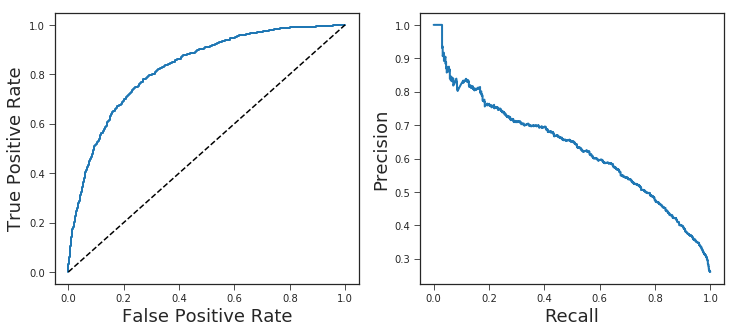

In [31]:
# hyper tuning best model
best_f1_score = 'structured'

x_train = (model_lists[best_f1_score]["x_train"])
x_train =  pd.DataFrame(x_train).fillna(0)
x_train = x_train.to_numpy()
x_test = (model_lists[best_f1_score]["x_test"])

y_train = model_lists[best_f1_score]["y_train"]
y_test = model_lists[best_f1_score]["y_test"]

model = XGBClassifier()
best_model = model.fit(x_train, y_train)

results.print_confusion_matrix(best_model, x_test, x_train, y_test, y_train)
results.train_test_reports(best_model, x_test, x_train, y_test, y_train)
results.plot_roc_curve(best_model, x_test, x_train, y_test, y_train)

Confusion Matrix :
[[924  89]
 [193 154]]
--------Training Data----------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3958
          1       1.00      1.00      1.00      1481

avg / total       1.00      1.00      1.00      5439

AUROC: 1.0
--------Testing Data----------
             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1013
          1       0.63      0.44      0.52       347

avg / total       0.78      0.79      0.78      1360

AUROC: 0.815066953807989


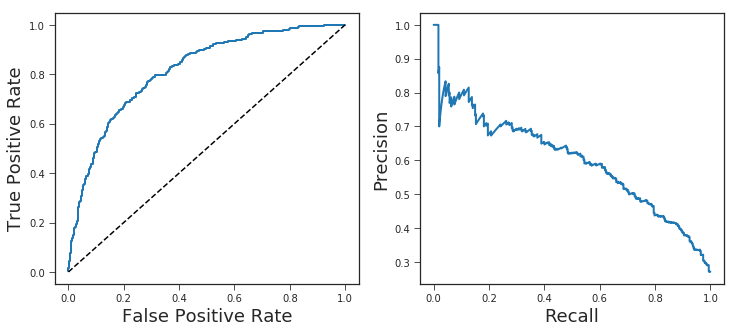

In [32]:
# hyper tuning best model
best_f1_score = 'structured and essays (cbow)'

x_train = (model_lists[best_f1_score]["x_train"])
x_train =  pd.DataFrame(x_train).fillna(0)
x_train = x_train.to_numpy()
x_test = (model_lists[best_f1_score]["x_test"])

y_train = model_lists[best_f1_score]["y_train"]
y_test = model_lists[best_f1_score]["y_test"]

model = XGBClassifier()
best_model = model.fit(x_train, y_train)

results.print_confusion_matrix(best_model, x_test, x_train, y_test, y_train)
results.train_test_reports(best_model, x_test, x_train, y_test, y_train)
results.plot_roc_curve(best_model, x_test, x_train, y_test, y_train)

## Erica 
- Use the model trained in the lines above.
- Use the matrix created from the essays and concatenate with the structured data.

#### Training Mismatches

In [1107]:
fits_df = pd.DataFrame({"aamc_id": data_obj1["train_idx"].aamc_id, 
                         "y_true": y_train, 
                         "pred_labels": fit_labels, 
                        "pred_score": fits})

In [1108]:
train_mismatch = fits_df[fits_df.y_true != fits_df.pred_labels]
full_mismatch = pd.merge(train_mismatch, score_data)
full_mismatch = full_mismatch[~full_mismatch.aamc_id.duplicated()]
full_mismatch

,aamc_id,y_true,pred_labels,pred_score,scrn_score_1,scrn_score_2
0,14320108,0.0,1.0,0.568702,3.0,3.0
1,13842443,0.0,1.0,0.503048,1.0,2.0
2,14337528,1.0,0.0,0.413080,2.0,1.0
3,14285381,1.0,0.0,0.488691,1.0,1.0
4,14311736,1.0,0.0,0.473498,1.0,1.0
...,...,...,...,...,...,...
273,14050596,1.0,0.0,0.491866,1.0,1.0
274,14122591,1.0,0.0,0.346608,1.0,1.0
276,13865423,1.0,0.0,0.358204,1.0,1.0
277,14102715,1.0,0.0,0.435143,1.0,1.0


In [639]:
roc_auc_score(y_test, y_score)

0.8389118279311388

In [621]:
score_data = pd.read_csv("/Volumes/Groups/IIME/IIME/EDS/data/admissions/essays/essays_latest.csv", 
                          usecols = ["aamc_id", "scrn_score_1", "scrn_score_2"])

In [640]:
preds_df = pd.DataFrame({"aamc_id": data_obj1["test_idx"].aamc_id, 
                         "y_true": y_test, 
                         "pred_labels": pred_labels, 
                        "pred_score": y_score})


In [708]:
mismatch_df = preds_df[preds_df.y_true != preds_df.pred_labels]
full_mismatch = pd.merge(mismatch_df, score_data)
full_mismatch = full_mismatch[~full_mismatch.aamc_id.duplicated()]
full_mismatch

,aamc_id,y_true,pred_labels,pred_score,scrn_score_1,scrn_score_2
0,14549088,1.0,0.0,0.194129,1.0,1.0
1,14329062,0.0,1.0,0.719998,1.0,1.0
10,14535134,0.0,1.0,0.762563,2.0,1.0
14,14165106,0.0,1.0,0.708145,1.0,3.0
15,14570230,0.0,1.0,0.646073,2.0,1.0
...,...,...,...,...,...,...
1612,14710268,0.0,1.0,0.806558,1.0,2.0
1619,14763580,1.0,0.0,0.258944,1.0,1.0
1621,14714110,0.0,1.0,0.555406,2.0,1.0
1622,14803612,0.0,1.0,0.872907,1.0,2.0


In [709]:
scrn_score = non_urm_matrix.outcome.reset_index()
scrn_score = scrn_score[scrn_score.aamc_id.isin(full_mismatch.aamc_id.tolist())]

In [713]:
full_mismatch = pd.merge(full_mismatch, scrn_score).set_index(mismatch_df.index)
full_mismatch.to_csv("../data/output/mismatches_newmodel_20200423.csv")

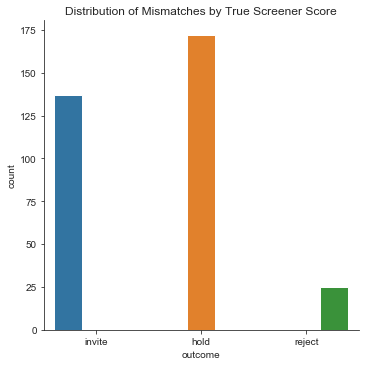

In [681]:

ax = sns.catplot(x = "outcome", hue = "outcome",
            data = full_mismatch, kind = "count")
ax = ax.set(title = "Distribution of Mismatches by True Screener Score")



In [645]:
# precision: out of the predicted positive, how many are true positive
# Recall: out of the total 

In [646]:
positive_preds = preds_df[preds_df.pred_labels == 1]
false_positive = positive_preds[positive_preds.y_true != positive_preds.pred_labels]
fp_idx = false_positive.index.tolist()

In [647]:
negative_preds = preds_df[preds_df.pred_labels == 0]
false_negative = negative_preds[negative_preds.y_true != negative_preds.pred_labels]
fn_idx = false_negative.index.tolist()

## Model Explanations

#### False positives and False Negatives

In [648]:
import shap
shap.initjs()

In [649]:
fp_exp = shap.TreeExplainer(best_model, X_test[fp_idx,:], feature_names = data_obj1["header"])
fp_vals = fp_exp.shap_values(X_test[fp_idx,:])

In [650]:
shap.force_plot(fp_exp.expected_value, fp_vals, X_test[fp_idx,:], feature_names = data_obj1["header"])

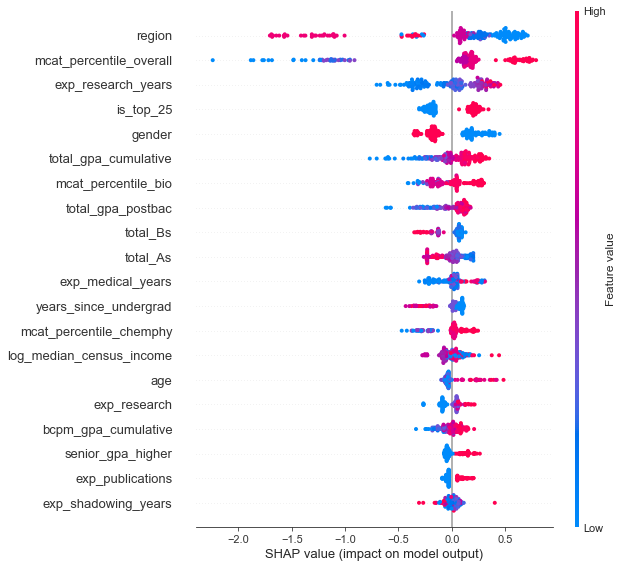

In [659]:
shap.summary_plot(fp_vals, X_test[fp_idx,:],feature_names=data_obj1["header"])

In [660]:
fn_exp = shap.TreeExplainer(best_model, X_test[fn_idx,:], feature_names = data_obj1["header"])
fn_vals = fn_exp.shap_values(X_test[fn_idx,:])


In [661]:
shap.force_plot(fn_exp.expected_value, fn_vals, X_test[fn_idx,:], feature_names = data_obj1["header"])

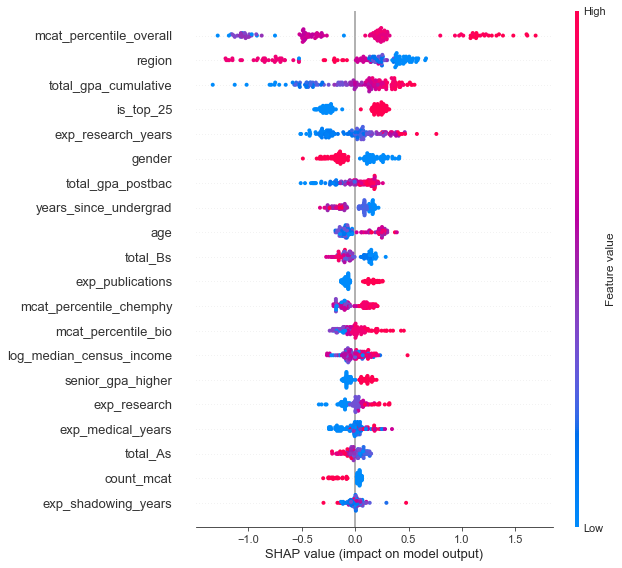

In [662]:
shap.summary_plot(fn_vals, X_test[fn_idx,:],feature_names=data_obj1["header"])

#### Mismatch Invites

In [716]:
invites = full_mismatch[full_mismatch.outcome == "invite"]
invite_idx = invites.index
inv_exp = shap.TreeExplainer(best_model, X_test[invite_idx,:])
inv_vals = inv_exp.shap_values(X_test[invite_idx,:])

In [717]:
shap.force_plot(inv_exp.expected_value, inv_vals, X_test[invite_idx,:], feature_names = data_obj1["header"])

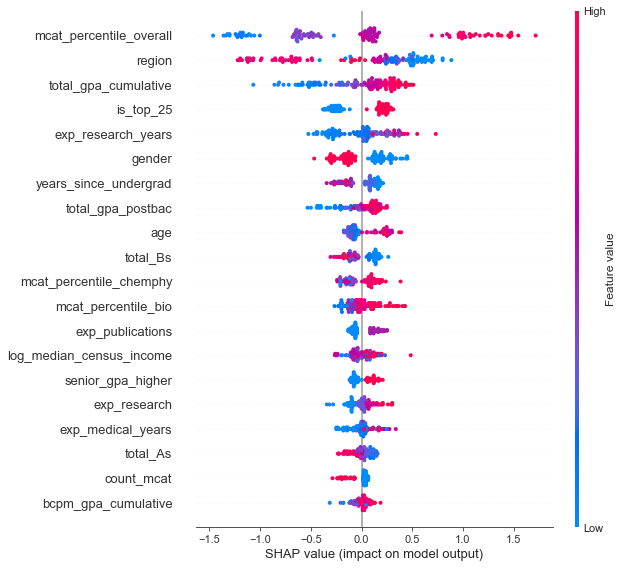

In [718]:
shap.summary_plot(inv_vals, X_test[invite_idx,:],feature_names=data_obj1["header"])

In [721]:
holds = full_mismatch[full_mismatch.outcome == "hold"]
holds_idx = holds.index
hold_exp = shap.TreeExplainer(best_model, X_test[holds_idx,:])
hold_vals = hold_exp.shap_values(X_test[holds_idx,:])

In [722]:
shap.force_plot(hold_exp.expected_value, hold_vals, X_test[holds_idx,:], feature_names = data_obj1["header"])

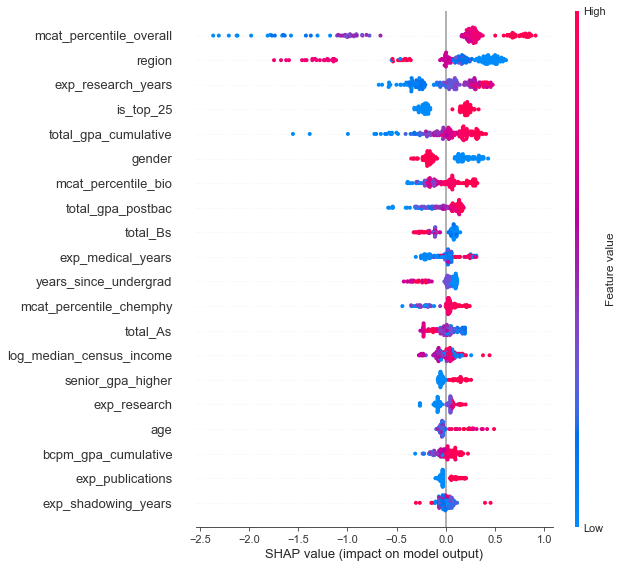

In [723]:
shap.summary_plot(hold_vals, X_test[holds_idx,:],feature_names=data_obj1["header"])

In [725]:
reject = full_mismatch[full_mismatch.outcome == "reject"]
rej_idx = reject.index
rej_exp = shap.TreeExplainer(best_model, X_test[rej_idx,:])
rej_vals = rej_exp.shap_values(X_test[rej_idx,:])

In [726]:
shap.force_plot(rej_exp.expected_value, rej_vals, X_test[rej_idx,:], feature_names = data_obj1["header"])

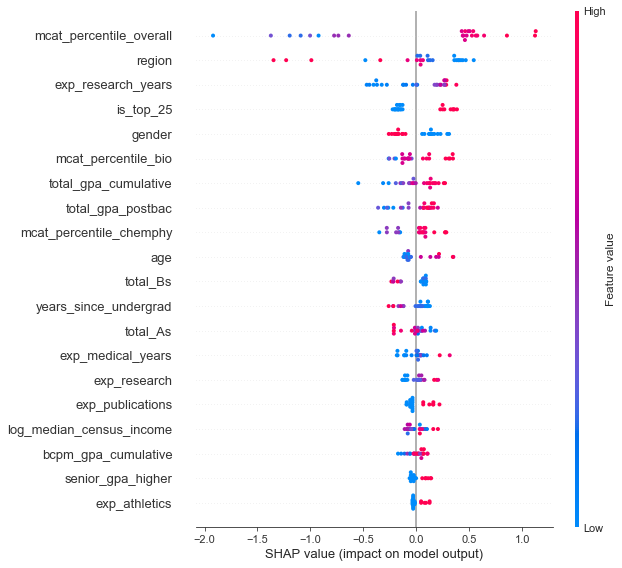

In [727]:
shap.summary_plot(rej_vals, X_test[rej_idx,:],feature_names=data_obj1["header"])

## Generative Model

In [728]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB

In [928]:
tmp_matrix = preprocessing.add_grades(non_urm_matrix.drop("outcome", 1))
tmp_matrix = preprocessing.add_region(tmp_matrix)
feature_matrix = preprocessing.log_income(tmp_matrix)

In [940]:

experience_cols = feature_matrix.columns[feature_matrix.columns.str.startswith("exp")].tolist()
hours_cols = feature_matrix.columns[feature_matrix.columns.str.contains("hours")].tolist()
binary_cols = feature_matrix.columns[feature_matrix.nunique() == 2].tolist()
suf = ('_As', '_Bs', '_Cs' ,'_Ds', '_Fs')
grade_cols = feature_matrix.columns[feature_matrix.columns.str.endswith(suf)].tolist()
char_cols = feature_matrix.select_dtypes(["object", "category"]).columns.tolist()


In [941]:
count_cols = list(set(experience_cols).union(set(hours_cols)).union(grade_cols)) + ["count_mcat", "years_since_undergrad"]

In [942]:
binary_cols = list(set(binary_cols).difference(set(count_cols)))

In [943]:
cat_cols = list(set(char_cols).difference(binary_cols)) 

In [944]:
num_cols = list(set(feature_matrix.columns).difference(set(count_cols + binary_cols + cat_cols)))

In [945]:

full_matrix = pd.merge(feature_matrix.reset_index(), decision, left_on = "aamc_id",
         right_on = "amcas_id", how = "left").drop("amcas_id", 1)
full_matrix["invite_type_id"].fillna(0, inplace = True)
presplit_matrix = full_matrix[~full_matrix["aamc_id"].duplicated()]

In [1005]:
num_matrix = presplit_matrix.loc[:,["aamc_id", "application_year", "invite_type_id"] + num_cols]

In [1021]:
num_obj = split_data_by_year(num_matrix, [2017, 2018], [2019])
imputer = SimpleImputer()
X_train = imputer.fit_transform(num_obj["X_train"])
X_test = imputer.transform(num_obj["X_test"])
y_train = num_obj["y_train"]
y_test = num_obj["y_test"]

In [1022]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1023]:
gn_pred = gnb.predict(X_test)
gn_score = gnb.predict_proba(X_test)[:,1]

In [1009]:
roc_auc_score(y_test, y_score)

0.7854768816525727

In [1025]:
bin_matrix = presplit_matrix.loc[:,["aamc_id", "application_year", "invite_type_id"] + binary_cols]
bin_matrix = preprocessing.categorize_columns(bin_matrix)

In [1026]:
bin_obj = split_data_by_year(bin_matrix, [2017, 2018], [2019])
imputer = SimpleImputer()
X_train = imputer.fit_transform(bin_obj["X_train"]).astype(int)
X_test = imputer.transform(bin_obj["X_test"]).astype(int)
y_train = bin_obj["y_train"].astype(int)
y_test = bin_obj["y_test"].astype(int)

In [1027]:
bern_nb = BernoulliNB()
bern_nb.fit(X_train, y_train)
bern_pred = bern_nb.predict(X_test)
bern_score = bern_nb.predict_proba(X_test)[:,1]

In [1013]:
roc_auc_score(y_test, y_score)

0.6194943794337964

In [1028]:
cat_matrix = presplit_matrix.loc[:,["aamc_id", "application_year", "invite_type_id"] + cat_cols + count_cols]
cat_matrix = preprocessing.categorize_columns(cat_matrix)

In [1029]:
cat_obj = split_data_by_year(cat_matrix, [2017, 2018], [2019])
imputer = SimpleImputer()
X_train = imputer.fit_transform(cat_obj["X_train"])
X_test = imputer.transform(cat_obj["X_test"])
y_train = cat_obj["y_train"]
y_test = cat_obj["y_test"]

In [1030]:
mult_nb = MultinomialNB()
mult_nb.fit(X_train, y_train)
mult_pred = mult_nb.predict(X_test)
mult_score = mult_nb.predict_proba(X_test)[:,1]

In [1017]:
roc_auc_score(y_test, y_score)

0.5721978807931098

In [1031]:
ens_preds = sum([gn_score, bern_score, mult_score])/3

In [1032]:
roc_auc_score(y_test, ens_preds)

0.7256530615106911